# Zomato Banglore Data Analysis Project

## ==> 1. Data Import and Data Exploration

### Importing Libraries

Importing necessary libraries for data analysis and visualization<br>
<b>Pandas</b>  for data manipulation and analysis<br>
<b>Regular expressions</b>  for string pattern matching and manipulation<br>
<b>Matplotlib</b> for basic plotting<br>
<b>Seaborn</b> for statistical data visualization<br>
<b>Ast module</b> for abstract syntax trees (used for literal evaluation)<br>
<b>Counter</b> for counting occurrences of elements in a collection<br>

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

### Read zomato data in a dataframe

Reading the CSV file into a Pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\hpram\OneDrive\Desktop\datasets\zomato.csv')

### Exploring zomato data

 Randomly selecting 5 rows from the DataFrame and displaying them.

In [3]:
random_rows = df.sample(5)
random_rows

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
43201,https://www.zomato.com/bangalore/happy-belly-b...,"6/2, Primrose Road, MG Road, Bangalore",Happy Belly Bakes,Yes,No,4.1 /5,119,080 48654072,MG Road,"Cafe, Bakery","Hot Chocolate, Waffles, Chicken Pizza, Brownie...","Cafe, Bakery",500,"[('Rated 4.0', 'RATED\n I am extremely fond o...","['Gooey Brownie', 'Chocolate Mousse', 'Baked T...",Dine-out,MG Road
35117,https://www.zomato.com/bangalore/7-star-biryan...,"507, 6th Block, 6th Cro6ss, Near Kormangala Cl...",7 Star Biryani,Yes,No,3.2 /5,15,+91 9880532833,Koramangala 6th Block,NaN,NaN,Biryani,250,"[('Rated 2.0', 'RATED\n biryani tastes not go...","['Plain Biryani', 'Chicken Biryani', 'Chicken ...",Delivery,Koramangala 7th Block
11461,https://www.zomato.com/bangalore/the-terrace-a...,"413, 100 Feet Road, Next E-Zone, Koramangala 4...",The Terrace at Gilly's Redefined,No,Yes,4.6/5,866,080 45128809,Koramangala 4th Block,"Microbrewery, Casual Dining","Cocktails, Beer, Mocktails, Biryani, Long Isla...","Continental, Finger Food, Asian, North Indian","1,400","[('Rated 4.0', 'RATED\n Ambiance - 4/5\nFood ...",[],Drinks & nightlife,BTM
19615,https://www.zomato.com/bangalore/kanti-sweets-...,"1202-1203, Srinidhi Complex, 20th Main, Maruth...",Kanti Sweets,Yes,No,4.1/5,113,080 41230605,BTM,Sweet Shop,NaN,"Mithai, Street Food",400,"[('Rated 5.0', 'RATED\n I ordered mysore pak ...",[],Delivery,Jayanagar
3050,https://www.zomato.com/bangalore/cool-bites-ko...,"100, 1st Cross, 2nd Main Chikku Lakshmi Layout...",Cool Bites,Yes,No,NaN,0,+91 9645786876,Koramangala 4th Block,Quick Bites,NaN,"Fast Food, Juices",200,[],[],Delivery,Basavanagudi


Displaying a concise summary of the DataFrame information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Displaying descriptive statistics of the numerical columns in the DataFrame

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


This following code prints the count of each unique value for the specified categorical columns. The output shows the distribution of different categories within each column, giving  an overview of the data's categorical composition.

In [6]:
# Count of unique values in categorical columns
for column in ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)',]:
    print(df[column].value_counts())
    print('\n')

online_order
Yes    30444
No     21273
Name: count, dtype: int64


book_table
No     45268
Yes     6449
Name: count, dtype: int64


location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64


rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64


cuisines
North Indian                      

Columns cuisines and rest_type have mixed data types , it might cause issues during analysis. In following section we have to resolve these issues.

### Handle missing Data


Counting the number of missing values in each column of the DataFrame and showing them accordingly.

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

 It looks like all the necessary data is already here. So we will not touch it

## ==> 2. Data Cleaning

### drop unwanted colums


We have no use of the following columns in our analysis. So we'll drop them for better memory and load optimizations


In [8]:
unwanted_columns = ['url', 'address', 'phone']

# Drop unwanted columns
df.drop(columns=unwanted_columns, inplace=True)

### cleaning rate column


We have some unwanted values in rate column of our DF. The following code will remove them. 

In [9]:
unwanted_values=['NEW','-']
df['rate'] = df['rate'].replace(unwanted_values, 3)

following code Splits the 'rate' column, extracting the numerical part, and converting it to float

In [10]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

### Cleaning reviews_list column

The following code applies a series of text cleaning operations to the 'reviews_list' column in a DataFrame.
 1. Removes non-ASCII characters from the text.
 2. Removes hexadecimal escape sequences in the form of '\x[0-9a-fA-F]{2}'.
 3. Removes specific patterns like 'Rated', 'RATED', '\', single quotes, and newline characters.
 4. Removes extra commas and whitespace.

In [11]:
df['reviews_list'] = df['reviews_list'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))
df['reviews_list'] = df['reviews_list'].apply(lambda x: re.sub(r'\\x[0-9a-fA-F]{2}', '', x))
df['reviews_list'] = df['reviews_list'].str.replace(r'Rated[\s\d.]+|RATED|\\+|\'|\\n', '', regex=True)
df['reviews_list'] = df['reviews_list'].str.replace(r',+\s*', '', regex=True)
random_reviews_list = df['reviews_list'].sample(5)
random_reviews_list

50759                                                   []
38713    [(n  Oye ! Been there several times and every ...
144                                                     []
376      [("n  taste is average less quantity they are ...
20362                                                   []
Name: reviews_list, dtype: object

### Cleaning Menu Column

The following code applies a series of text cleaning operations to the 'menu_item' column in a DataFrame.
 1. Removes non-ASCII characters from the text.
 2. Removes hexadecimal escape sequences in the form of '\\x[0-9a-fA-F]{2}'.
 3. Removes backslashes and newline characters.

In [12]:
df['menu_item'] = df['menu_item'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))
df['menu_item'] = df['menu_item'].str.replace(r'\\x[0-9a-fA-F]{2}', '', regex=True)
df['menu_item'] = df['menu_item'].str.replace("\\+|\\n", '', regex=True)
random_menu_item = df['menu_item'].sample(5)
random_menu_item

23471    ['Guntur Chicken Dry', 'Guntur Chicken Gravy',...
17346    ['3 Idlis with 1 Vada', 'Rava Idli with 1 Vada...
50508                                                   []
45977                                                   []
22505                                                   []
Name: menu_item, dtype: object

The following code applies the ast.literal_eval function to convert string representations of Python literals in the 'menu_item' column of a DataFrame to their corresponding Python objects.

In [13]:
df['menu_item'] = df['menu_item'].apply(ast.literal_eval)

The following code creates a new column 'num_menu_items' in the DataFrame, representing the number of items in each list in the 'menu_item' column.

In [14]:
df['num_menu_items'] = df['menu_item'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [15]:
random_rows = df.sample(5)
random_rows

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),num_menu_items
25604,Spice Kitchen,Yes,Yes,3.9,321,Kalyan Nagar,Casual Dining,"Andhra Thali, Veg Thali, Chicken Biryani, Kodi...","Andhra, Biryani, Seafood, North Indian",750,"[(""n Wat a yummilicious Hyderabadi mutton dum...","[Boneless Chicken 65, Andhra Style Chilli Chic...",Delivery,Kammanahalli,140
45785,Biryani Palace,No,No,3.2,7,Jeevan Bhima Nagar,Quick Bites,NaN,"Biryani, Fast Food",200,"[(""n The place is small and has bad ventilati...",[],Dine-out,Old Airport Road,0
49519,Coffee Tea & More,No,No,NaN,0,Bellandur,Quick Bites,NaN,"Fast Food, Coffee",100,[],[],Delivery,Sarjapur Road,0
29405,30 Square,Yes,No,4.2,557,Koramangala 5th Block,Quick Bites,"Veg Momos, Noodles, Cheese Momos, Jhol Momos, ...","Tibetan, Nepalese, Momos",400,"[(""n Cosy ambiencereasonably-priced food opti...","[Peri Peri Fries, Make Your Own Veg Wok, Make ...",Delivery,Koramangala 5th Block,53
12021,Bhaiya Ji Food Court,No,No,3.0,16,Ulsoor,Quick Bites,NaN,"North Indian, Street Food",150,"[(""n Nice good food and service best friend s...",[],Delivery,Church Street,0


### Doing Restaurant type column

In [16]:
#the following code split 'rest_type' into a list of rest_type
df['rest_type']= df['rest_type'].str.split(', ')


In [17]:
# Create a new column for the first rest type
df['first_rest_type'] = df['rest_type'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


In [18]:
# Create a new column for the second rest type
df['second_rest_type'] = df['rest_type'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)


### Doing approx_cost(for two people) column

The following code convert 'approx_cost(for two people)' to numeric

In [19]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

### Doing dish_liked column

The following code split 'dish_liked' into a list of dish_liked

In [20]:
df['dish_liked'] = df['dish_liked'].str.split(', ')


In [21]:
# Count occurrences of each dish liked
dish_liked_counts = Counter(dish for likes in df['dish_liked'] if isinstance(likes, list) for dish in likes)


In [22]:
# Create a DataFrame from the Counter
count_df_dish_liked = pd.DataFrame(list(dish_liked_counts.items()), columns=['Dish Liked', 'Count']).sort_values(by='Count',ascending=False).head(10)
count_df_dish_liked

,Dish Liked,Count
0,Pasta,3409
57,Burgers,3024
332,Cocktails,2832
33,Pizza,2737
83,Biryani,2092
35,Coffee,1994
34,Mocktails,1887
37,Sandwiches,1676
73,Paratha,1566
75,Noodles,1415


# DATA ANALYSIS

## Online Presence Analysis:

### What is the distribution of restaurants that offer online orders?

It shows that we have more than 30000 restaurants which take online orders and restuarants which do not takes online orders are comparatively less.


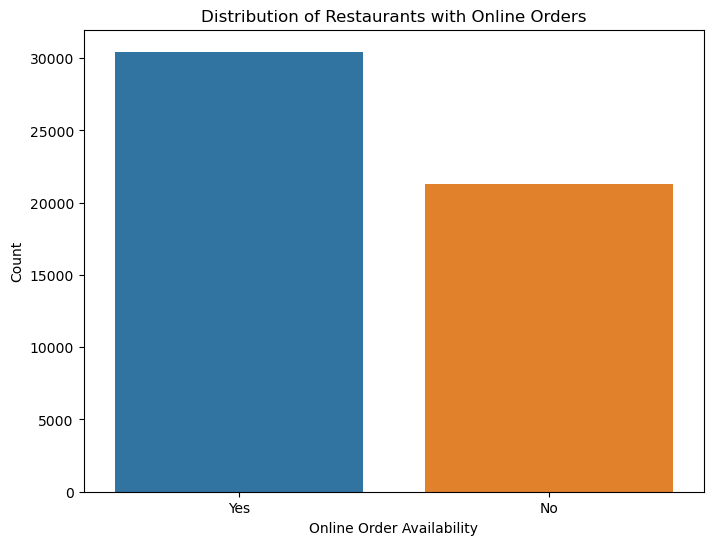

In [23]:
# Distribution of restaurants with online orders
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=df)
plt.title('Distribution of Restaurants with Online Orders')
plt.xlabel('Online Order Availability')
plt.ylabel('Count')
plt.show()

### Is there any correlation between online order availability and the overall rating?

It shows that restaurats which takes online order has 50 percent ratings between 3.5 and 4.0

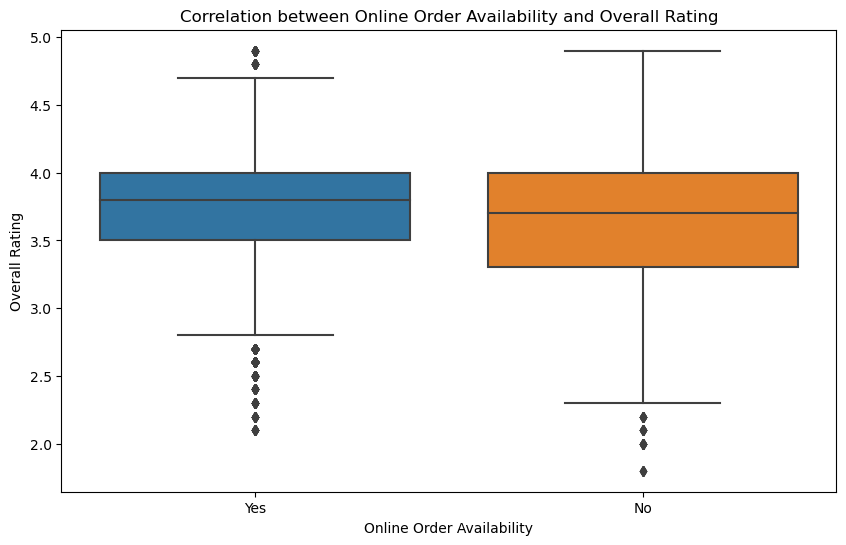

In [24]:
# Correlation between online order availability and overall rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df, order=['Yes', 'No'])
plt.title('Correlation between Online Order Availability and Overall Rating')
plt.xlabel('Online Order Availability')
plt.ylabel('Overall Rating')
plt.show()

## Booking Trends:

### How many restaurants allow table booking?

It shows that most of the reataurants in the city do not allow table booking.

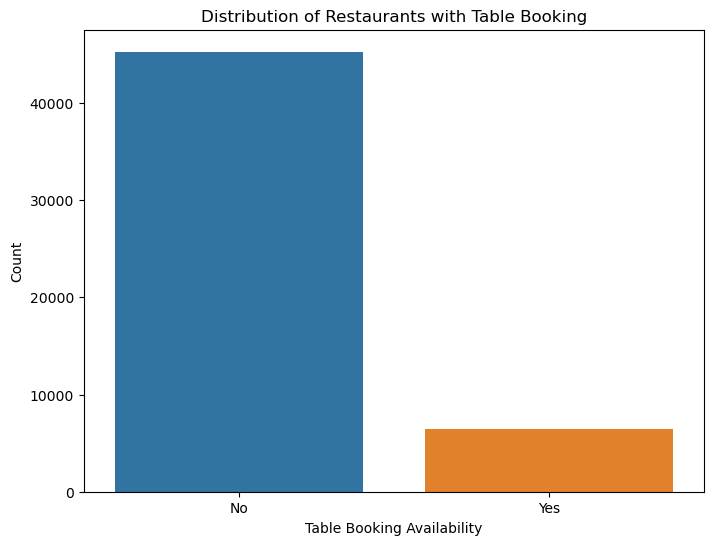

In [25]:
# How many restaurants allow table booking?
booking_counts = df['book_table'].value_counts()

# Plot the distribution of restaurants with and without table booking
plt.figure(figsize=(8, 6))
sns.barplot(x=booking_counts.index, y=booking_counts.values)
plt.title('Distribution of Restaurants with Table Booking')
plt.xlabel('Table Booking Availability')
plt.ylabel('Count')
plt.show()

### Are restaurants with booking options more likely to have higher ratings?

It shows that the restaurants which allows table bookings have higher ratings compare to the others

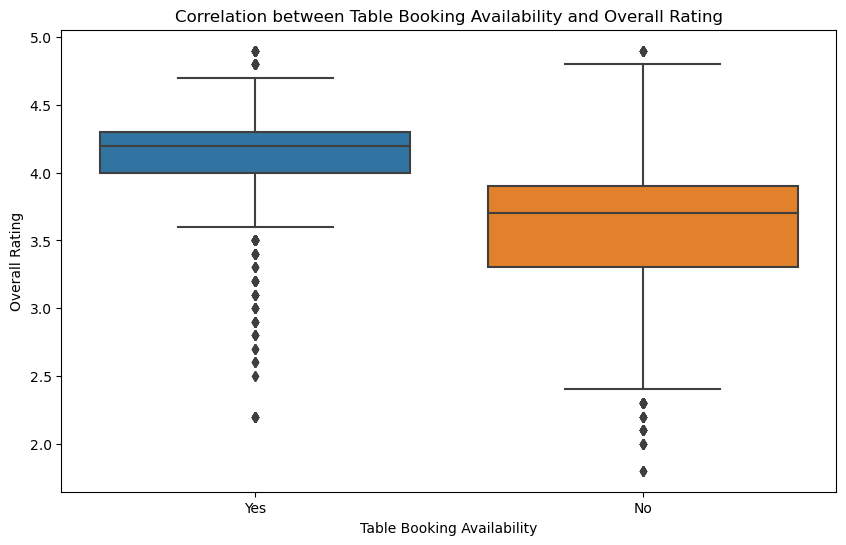

In [26]:
# Are restaurants with booking options more likely to have higher ratings?
plt.figure(figsize=(10, 6))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Correlation between Table Booking Availability and Overall Rating')
plt.xlabel('Table Booking Availability')
plt.ylabel('Overall Rating')
plt.show()

## Rating and Votes Analysis:

### Is there a correlation between the average rating and the number of votes received?

It shows the trend in which restaurants which have higher no of votes has higher ratings. and it is quite normal.

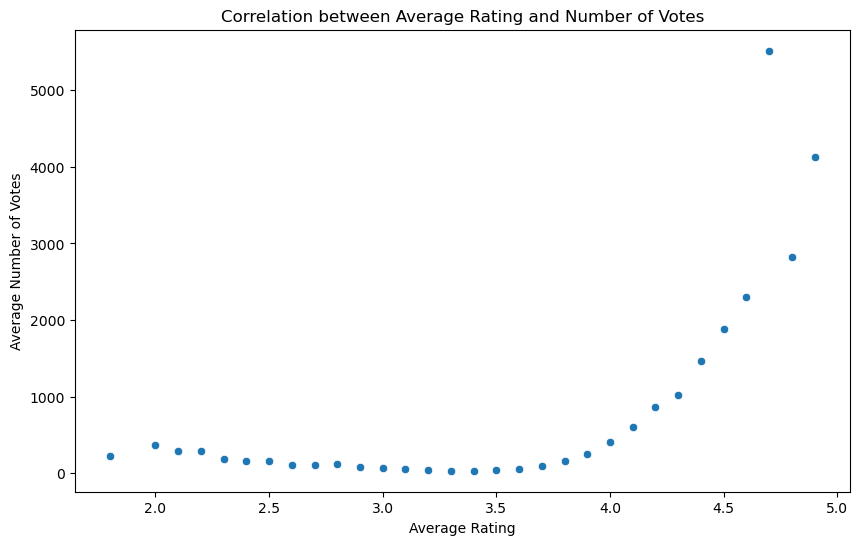

In [27]:
# Correlation between average rating and the number of votes
avg_rating_votes_corr = df[['rate', 'votes']].dropna().groupby('rate').mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=avg_rating_votes_corr.index, y='votes', data=avg_rating_votes_corr)
plt.title('Correlation between Average Rating and Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Average Number of Votes')
plt.show()

## Cuisine Analysis:

### What are the most popular cuisines among the listed restaurants?

It shows that North indian is the most popular cuisine in banglore and then all others.

In [28]:
# Split the 'cuisines' column into a list of cuisines
df['cuisines'] = df['cuisines'].str.split(', ')

In [29]:
# Exploring the most popular cuisines
all_cuisines_count = Counter(cuisine for cuisines_list in df['cuisines'] if isinstance(cuisines_list, list) for cuisine in cuisines_list)
popular_cuisines = pd.DataFrame.from_dict(all_cuisines_count, orient='index', columns=['Count']).reset_index().sort_values(by='Count',ascending=False).head(10)
popular_cuisines.columns = ['cuisines', 'Count']
popular_cuisines.set_index('cuisines',inplace=True)
popular_cuisines

,Count
cuisines,
North Indian,21085
Chinese,15547
South Indian,8644
Fast Food,8096
Biryani,6492
Continental,5765
Desserts,5633
Cafe,5303
Beverages,4747


<Figure size 1200x600 with 0 Axes>

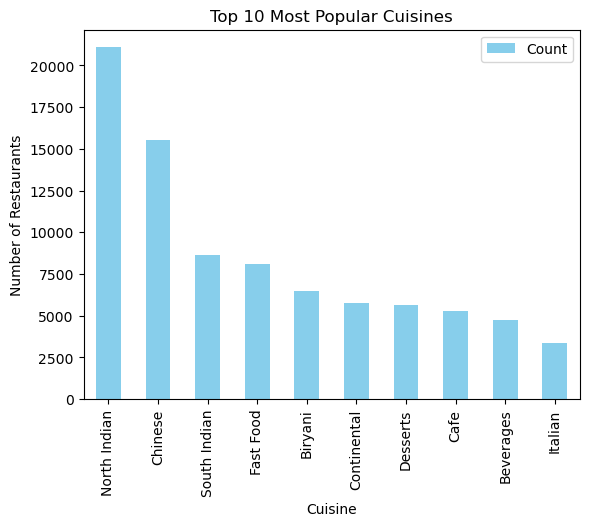

In [30]:
# Plot the distribution of the most popular cuisines
plt.figure(figsize=(12, 6))
popular_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()

## Menu Item Insights:

### What are the top 10 menu items restaurants have?

It shows that most of the restaurants have Chicken fried rice in their menu. It gives us the insight that maybe it is the most popular and most eaten dish in banglore.


In [31]:
# Flatten the list of menu items across all restaurants
all_menu_items = [item for sublist in df['menu_item'] for item in sublist]

In [32]:
# Get the top 5 most frequently ordered menu items
top_menu_items = Counter(all_menu_items).most_common(10)

In [33]:
# Display the top menu items
print("Top 5 Most Frequently Ordered Menu Items:")
for item, count in top_menu_items:
    print(f"{item}: {count} times")


Top 5 Most Frequently Ordered Menu Items:
Chicken Fried Rice: 4550 times
Veg Fried Rice: 4306 times
Paneer Butter Masala: 3883 times
Jeera Rice: 3776 times
Egg Fried Rice: 3404 times
Gobi Manchurian: 3386 times
Ghee Rice: 3273 times
Chicken Biryani: 3119 times
Veg Biryani: 2945 times
Paneer Manchurian: 2836 times


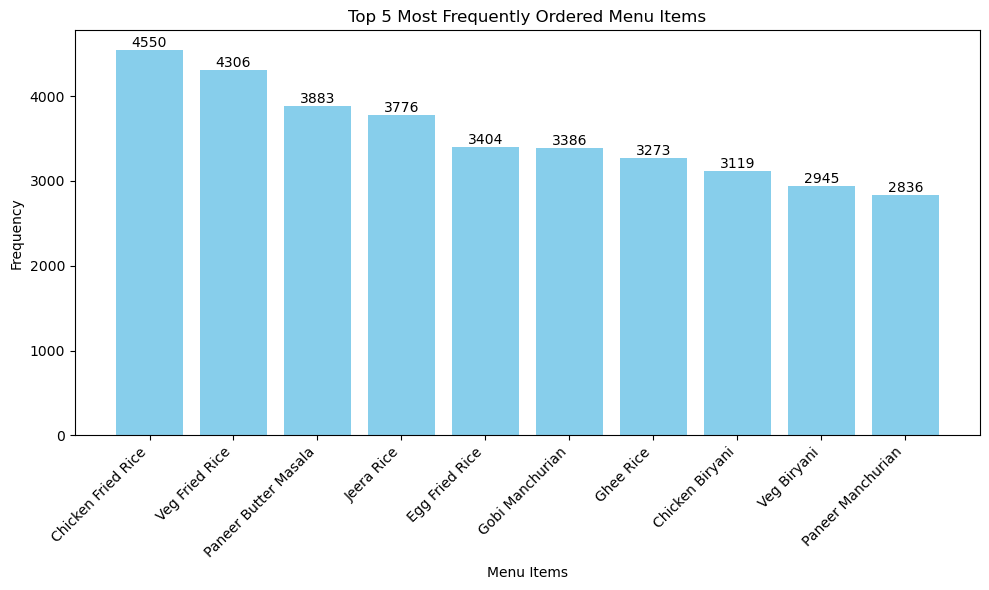

In [34]:
# Plot a bar chart
menu_items, counts = zip(*top_menu_items)

plt.figure(figsize=(10, 6))
bars=plt.bar(menu_items, counts, color='skyblue')
plt.xlabel('Menu Items')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequently Ordered Menu Items')
plt.xticks(rotation=45, ha='right')

# Add labels on top of each bar
for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()  

### What are the top 10 most liked dishes ?

It shows that the most liked dish is pasta in the city and then others dishes have their value below pasta.

In [35]:
count_df_dish_liked.set_index('Dish Liked',inplace=True)
count_df_dish_liked

,Count
Dish Liked,
Pasta,3409
Burgers,3024
Cocktails,2832
Pizza,2737
Biryani,2092
Coffee,1994
Mocktails,1887
Sandwiches,1676
Paratha,1566


<Figure size 1200x600 with 0 Axes>

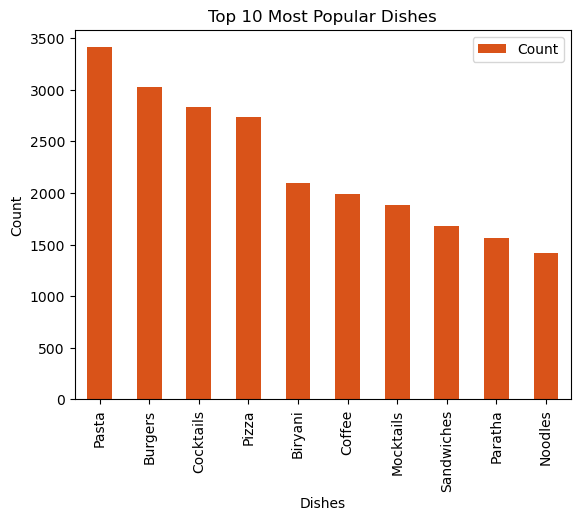

In [36]:
plt.figure(figsize=(12, 6))
count_df_dish_liked.plot(kind='bar', color=(0.8500,0.3250,0.0980))
plt.title('Top 10 Most Popular Dishes')
plt.xlabel('Dishes')
plt.ylabel('Count')
plt.show()

## Location-Based Analysis:

### How does the distribution of restaurant ratings vary across different locations?

With thorough examination of the plot it becomes evident that restaurants situated in Lavelle Road, Bangalore, tend to exhibit higher overall ratings compared to establishments in other locations. This observation suggests that Lavelle Road is associated with a higher level of customer satisfaction or perceived quality in terms of restaurant experiences.

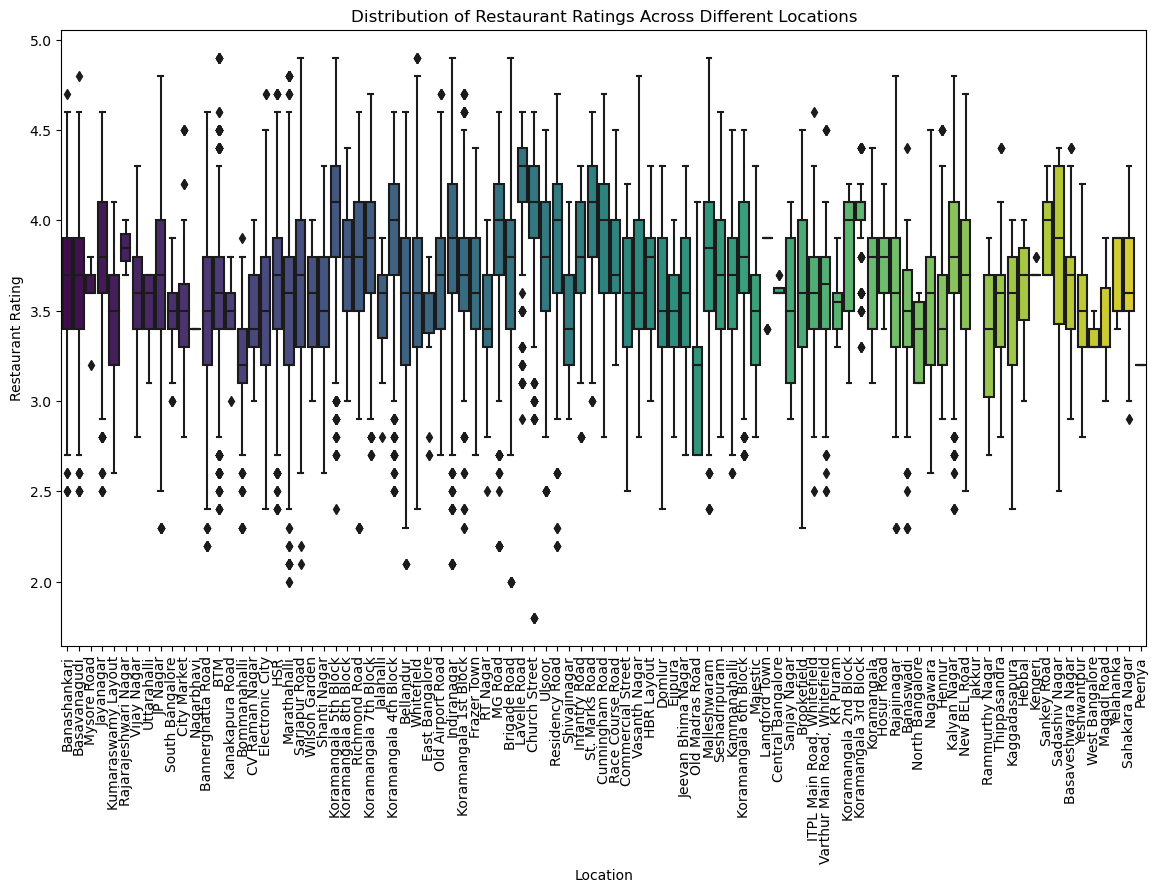

In [37]:
# Plot the distribution of restaurant ratings across different locations
plt.figure(figsize=(14, 8))
sns.boxplot(x='location', y='rate', data=df, palette='viridis')
plt.title('Distribution of Restaurant Ratings Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Restaurant Rating')
plt.xticks(rotation=90)
plt.show()

### Are there any location-specific trends in terms of online orders ?

Analyzing the plot reveals a notable trend in the BTM area of Bangalore, where a higher number of restaurants opt for online orders compared to those that do not. 


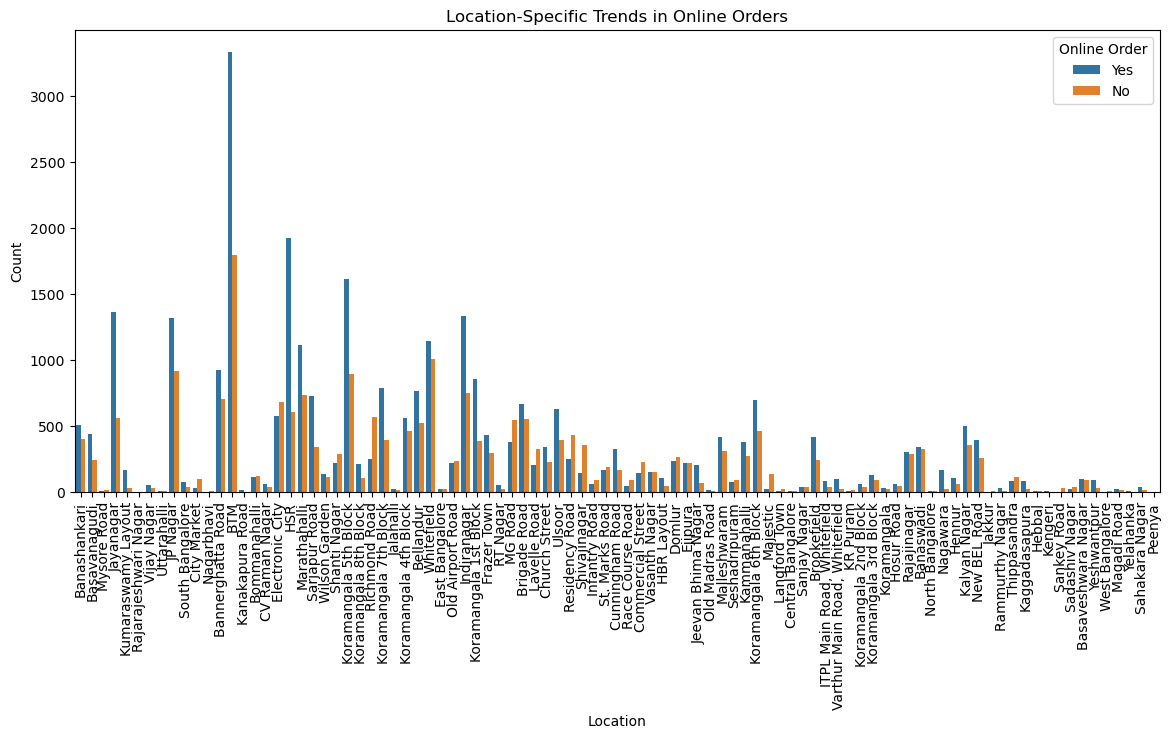

In [38]:
# Location-specific trends in terms of online orders
plt.figure(figsize=(14, 6))
sns.countplot(x='location', hue='online_order', data=df)
plt.title('Location-Specific Trends in Online Orders')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Online Order')
plt.show()

This pattern suggests a tech-savvy and convenience-oriented population in the BTM locality, possibly comprising individuals who prefer the ease of online ordering and delivery services. The prevalence of restaurants offering online orders in this area may cater to a demographic that values time efficiency and modern conveniences.

## Cost Analysis:

### What is the average cost for two people in different types of restaurants?

we have some missing or Nan values in our 'approx_cost(for two people)' column so we will replace them by median.

In [39]:
#Impute missing values in the 'approx_cost(for two people)' column with the median
median_cost = df['approx_cost(for two people)'].median()
df['approx_cost(for two people)'].fillna(median_cost, inplace=True)

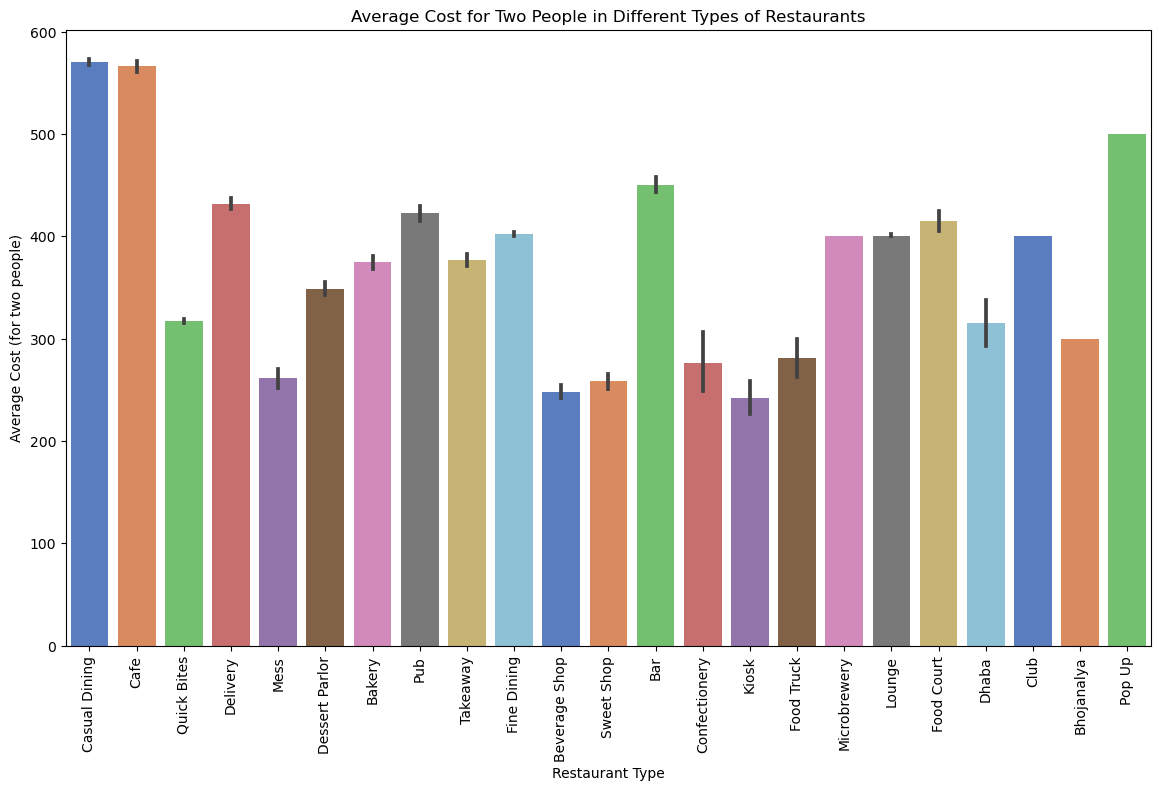

In [40]:
# Plot the average cost for two people in different types of restaurants
plt.figure(figsize=(14, 8))
sns.barplot(x='first_rest_type', y='approx_cost(for two people)', data=df,estimator='mean', palette='muted')
plt.title('Average Cost for Two People in Different Types of Restaurants')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost (for two people)')
plt.xticks(rotation=90)
plt.show()


The dark black patches (or lines) above  the bar represent the <b>confidence interval</b> around the mean estimate.The width of the confidence interval indicates the level of uncertainty associated with the mean estimate. A wider interval suggests greater uncertainty, while a narrower interval suggests more precision.

## Restaurant Type Exploration:

### What is the distribution of different restaurant types (e.g., cafes, bars, fine dining) in the dataset?

In [41]:
from collections import Counter

# Count occurrences of each rest type
rest_type_counts = Counter(rest_type for types in df['rest_type'] if isinstance(types, list) for rest_type in types)
print(rest_type_counts)

Counter({'Quick Bites': 20639, 'Casual Dining': 13057, 'Cafe': 5074, 'Delivery': 4641, 'Dessert Parlor': 3211, 'Bar': 2457, 'Takeaway': 2157, 'Bakery': 1998, 'Beverage Shop': 1471, 'Pub': 950, 'Food Court': 765, 'Sweet Shop': 745, 'Lounge': 555, 'Fine Dining': 405, 'Microbrewery': 390, 'Mess': 274, 'Kiosk': 192, 'Food Truck': 84, 'Confectionery': 47, 'Club': 41, 'Dhaba': 40, 'Irani Cafee': 15, 'Meat Shop': 4, 'Bhojanalya': 3, 'Pop Up': 2})


In [42]:
# Create a DataFrame from the Counter
count_df = pd.DataFrame(list(rest_type_counts.items()), columns=['Rest Type', 'Count'])
count_df.sort_values(by='Count',ascending=False)

,Rest Type,Count
2,Quick Bites,20639
0,Casual Dining,13057
1,Cafe,5074
3,Delivery,4641
5,Dessert Parlor,3211
12,Bar,2457
8,Takeaway,2157
6,Bakery,1998
10,Beverage Shop,1471
7,Pub,950


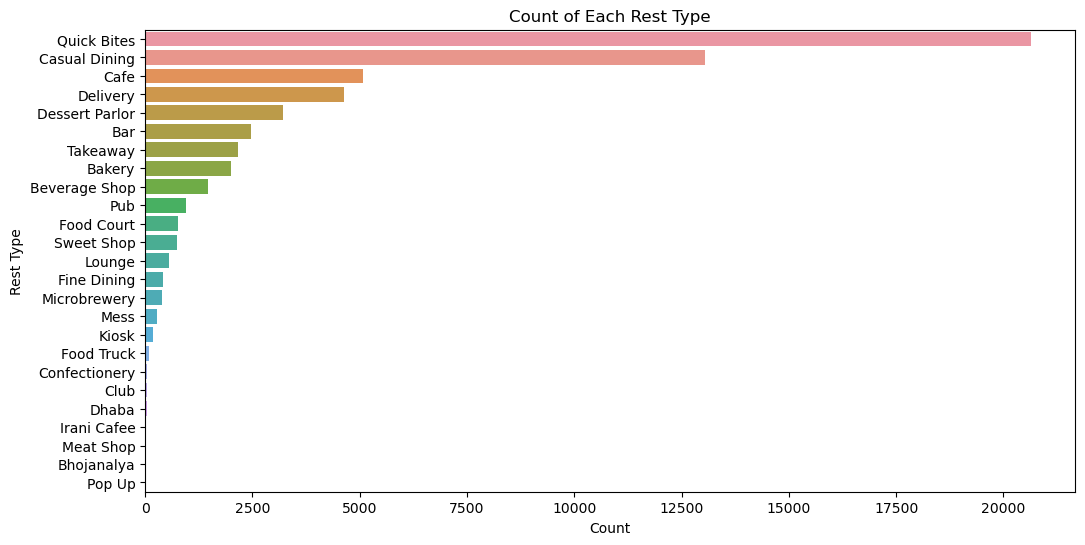

In [43]:
# Plot a count plot chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Rest Type', data=count_df.sort_values(by='Count', ascending=False))
plt.title('Count of Each Rest Type')
plt.xlabel('Count')
plt.ylabel('Rest Type')
plt.show()

It was observed that the 'Quick Bites' restaurant type is the most popular, with a significant presence in the data. The majority of the restaurants fall under the 'Quick Bites' category.

### Do specific types of restaurants tend to have higher ratings ?

Yes, It becomes evident that the 'Microbrewery' restaurant type consistently receives higher ratings compared to other restaurant types.

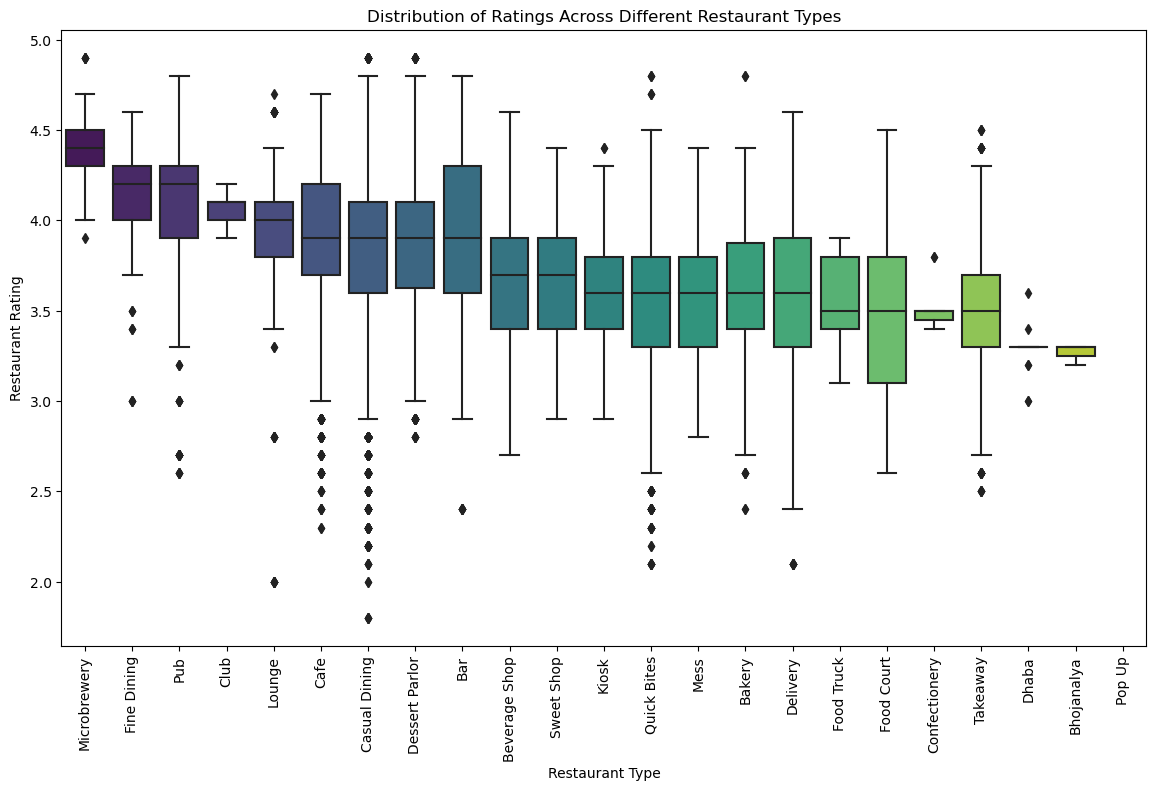

In [44]:
# Check if specific types of restaurants tend to have higher ratings
plt.figure(figsize=(14, 8))
sns.boxplot(x='first_rest_type', y='rate', data=df, palette='viridis', order=df.groupby('first_rest_type')['rate'].median().sort_values(ascending=False).index)
plt.title('Distribution of Ratings Across Different Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Restaurant Rating')
plt.xticks(rotation=90)
plt.show()

### Is there a relationship between Restaurant listed type and the overall rating?

It was observed that no clear correlation or trend is apparent. The distribution of ratings appears to be fairly uniform across different restaurant types, indicating that the listed type alone may not be a strong predictor of overall rating in the dataset.

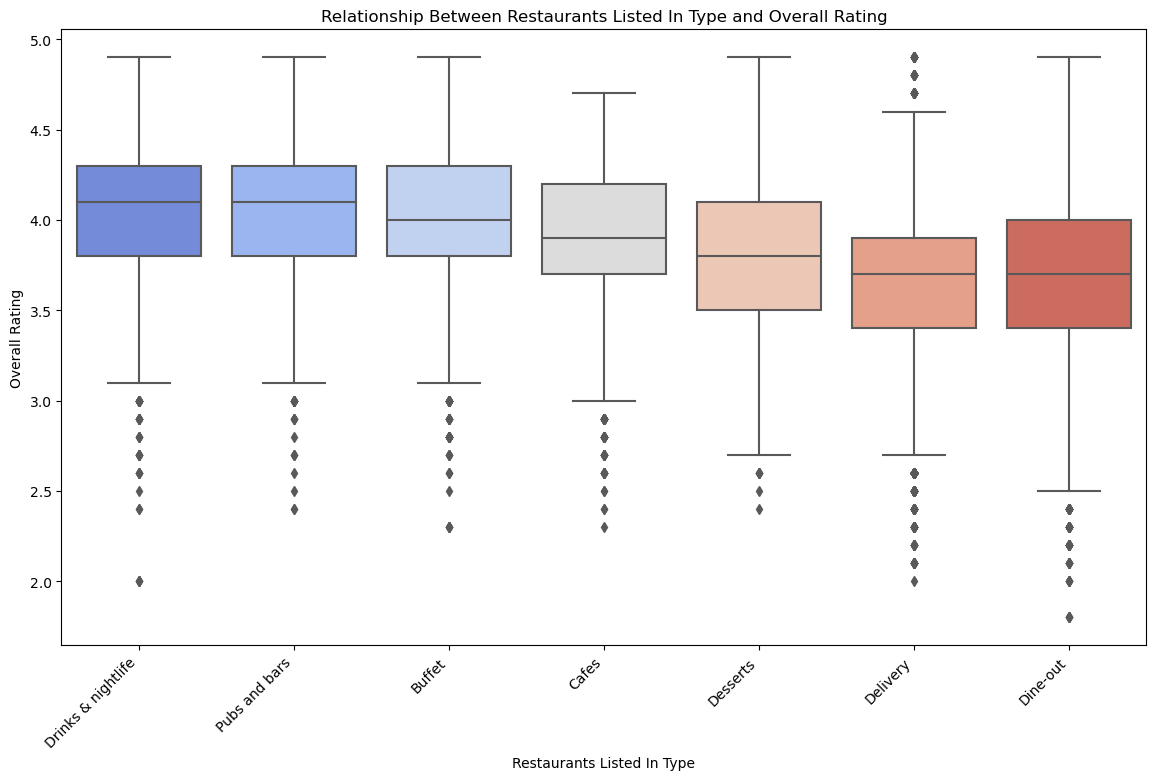

In [45]:
# Check the relationship between listed type and overall rating
plt.figure(figsize=(14, 8))
sns.boxplot(x='listed_in(type)', y='rate', data=df, palette='coolwarm', order=df.groupby('listed_in(type)')['rate'].median().sort_values(ascending=False).index)
plt.title('Relationship Between Restaurants Listed In Type and Overall Rating')
plt.xlabel('Restaurants Listed In Type')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.show()